In [70]:
#import libraries
import numpy as np # linear algebra
import seaborn as sns # for statistical data analysis and visualization
import pandas as pd #data preparation and data  manipulation
#incase of plotting and data visualizaion
import matplotlib.pyplot as plt
%matplotlib inline

import graphviz #visualization of leaf nodes 
#machine learning libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
#Control Display of data #optional
pd.options.display.max_columns=50
sns.set(style="darkgrid", rc={"axes.facecolor":"#CAF1DE"})

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Loading datasets
df = pd.read_csv('heart_disease.csv')
# print the data with df
df.head(5)##

NameError: name 'pd' is not defined

In [89]:
#logistic regression
#show number of people with heart disease
#column for target
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [90]:
#mean for training and testing data
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


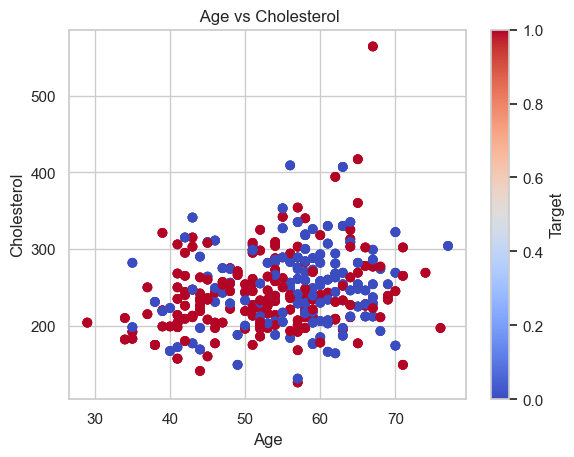

In [64]:
age = df['age']
chol = df['chol']

# Create scatter plot
plt.scatter(age, chol, c=df['target'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title(' Age vs Cholesterol')
plt.colorbar(label='Target')
plt.show()

In [91]:
#create logistic regression
#helps to solve problems with classification and regression
y= df.target.values
x_data=df.drop(['target'],axis=1)

In [81]:
#normalize the data
x= (x_data -np.min(x_data))/ (np.max(x_data)-np.min(x_data))

In [82]:
#split the data 80% for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_test,y_train= train_test_split(x_data,y,test_size=0.20,random_state =0)


In [83]:
#transpose matrices
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

In [85]:
#get accuracy for logistic regression
from sklearn.linear_model import LogisticRegression
accuracies={}
lr=LogisticRegression()
lr.fit(X_train.T,y_train.T)

accuracies= lr.score(X_test.T.y_test.T)*100
accuracies['LogisticRegression']= accuracies


#print output
print('Test accuracy is{:.2f}:'.format(accuracies))

ValueError: Found input variables with inconsistent numbers of samples: [120, 30]

In [38]:
#k_nearest neigbor 
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train.T,y_train.T)
#knn.fit(X_train, y_train)
prediction= knn.predict(X_test.T)
print("{}NN score:{:.2f}%".format(2,knn.score(X_test.T,y_test.T)*100))

ValueError: Found input variables with inconsistent numbers of samples: [13, 205]

In [40]:
#maaximum k-nn score for the module
score_list =[]
for i in range(1,20):
    knn =  KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train.T,y_train.T)
    score_list.append(knn.score(X_test.T,y_test.T))
#show using a line plot
plt.plot(range(1,20),score_list)
plt.xtricks(np.arange(1,20,1))
plt.xlabel('k values')
plt.ylabel('Score')
plt.title('Maximum KNN score')
plt.show()
#max score
accuracies= max(score_list)*100
accuracies=accuracies['knn']
print('{}max knn score is{:.2f}'.format(accuracies))

ValueError: Found input variables with inconsistent numbers of samples: [13, 205]

In [41]:
#test accuracy for support Vector Machine.SVN
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(X_train.T,y_train.T)
accuracies= svm.score(X_train.T,y_train.T) *100
accuracies['SVM'] = accuracies
print('Test accuracy of svm is{:.2f}'.format(accuracies))




ValueError: Found input variables with inconsistent numbers of samples: [13, 205]

In [43]:
#accuracy for naiva baise algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train.T,y_train.T)
accuracies =nb.score (X_test.T,y_test.T)*100
accuracies= accuracies["Naive Bayes"]
print('test accuracy of nb {:.2f}%'.format(accuracies))


ValueError: Found input variables with inconsistent numbers of samples: [13, 205]

In [44]:
#accuracy for decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train.T,y_train.T)
accuracies = dtc.score(X_test.T,y_test.T)
accuracies['Decision Tree']= accuracies
print('Acccuracy of dtc is{:.2f}:'.format(accuracies))

ValueError: Number of labels=205 does not match number of samples=13

In [45]:
#accuracy for random forest classification Algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,random_state=1)
rf.fit(X_train.T,y_train.T)
acc=rf.score(X_test.T,y_test.T)*100
accuracies['Random Forest']= acc
print("accuracy of random forest{:.2f}%".format(acc))

ValueError: Found input variables with inconsistent numbers of samples: [13, 205]

ValueError: min() arg is an empty sequence

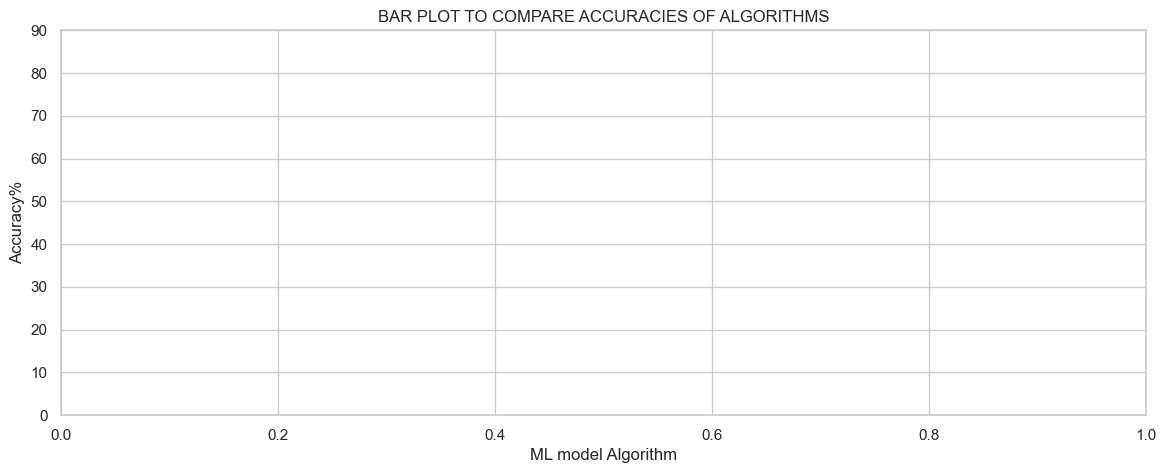

In [49]:
#a Barplot to show accuracies
colors= ['#008BBB','#223B87','#5F9EA0','#0FFBBAE','#DDA520','#CFC60E']
sns.set_style('whitegrid')
plt.figure(figsize=(14,5))
plt.yticks(np.arange(0,100,10))
plt.title('BAR PLOT TO COMPARE ACCURACIES OF ALGORITHMS')
plt.ylabel('Accuracy%')
plt.xlabel('ML model Algorithm')
sns.barplot(x = list(accuracies.keys()),y=list(accuracies.values()),palette = colors)
plt.show()


In [51]:
#ML confusion matrix
#evaluates the performance of a model
#predicted values
y_head_lr =lr.predict(X_test.T)
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train.T,y_train.T)
y_head_knn =knn3.predict(X_test.T)
y_head_svm = svm.predict(X_test.T)
y_head_nb = nb.predict(X_test.T)
y_head_dtc = dtc.predict(X_test.T)
y_head_rf = rf.predict(X_test.T)


AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [50]:
#IMPORT MODULE FOR CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm_lr =confusion_matrix(y_test,y_head_lr)
cm_svm =confusion_matrix(y_test,y_head_svm)
cm_nb =confusion_matrix(y_test,y_head_nb)
cm_dtc =confusion_matrix(y_test,y_head_dtc)
cm_rf =confusion_matrix(y_test,y_head_rf)
cm_knn = confusion_matrix(y_test,y_head_knn)

NameError: name 'y_head_lr' is not defined

In [52]:
#plot heatmap for models using confusion matrix
plt.figure(figsize=(24,12))
plt.subtitle('confusion_matrices',fontsize = 24)
plt.subplots_adjust(wspace=0.4,hspace=0.4)
#heat map for logistic  regression confusion matrix
plt.subplot(2,3,1)
plt.title('logistic  regression confusion matrix',fontsize =5)
sns.heatmap(cm_lr,annot=True, cmap='Blues',fmt='d',cbar=False,annot_kws={'size':24})
plt.show()
#heat map for Knn confusion matrix
plt.subplot(2,3,2)
plt.title('K-Nearest neigbor matrix',fontsize =5)
sns.heatmap(cm_knn,annot=True, cmap='Blues',fmt='d',cbar=False,annot_kws={'size':24})
plt.show()
#heat map for naives bayes confusion matrix
plt.subplot(2,3,3)
plt.title('Naives Bayes confusion matrix',fontsize =5)
sns.heatmap(cm_nb,annot=True, cmap='Blues',fmt='d',cbar=False,annot_kws={'size':24})
plt.show()
#heat map for Dceision tree confusion matrix
plt.subplot(2,3,4)
plt.title('Decision Tree confusion matrix',fontsize =5)
sns.heatmap(cm_dtc ,annot=True, cmap='Blues',fmt='d',cbar=False,annot_kws={'size':24})
plt.show()





AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

<Figure size 2400x1200 with 0 Axes>